In [ ]:
##Classifier using ANN

In [ ]:
 ## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
## Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature Scaling We required feature scaling in ANN feature scaling is required in gradient descent as it helps in faster convergence as the values are smaller
#difference fit_transform and transform to avoid data leakage
#based on the train data we do fit and transform and only transform on the test data
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
### Lets initialize the ANN
classifier=Sequential()

In [ ]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [ ]:
classifier

In [ ]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [ ]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [ ]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5

)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 5s 3ms/step - loss: 0.4203 - accuracy: 0.8152 - val_loss: 0.3621 - val_accuracy: 0.8540
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3665 - accuracy: 0.8480 - val_loss: 0.3506 - val_accuracy: 0.8640
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3541 - accuracy: 0.8529 - val_loss: 0.3364 - val_accuracy: 0.8610
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3499 - accuracy: 0.8564 - val_loss: 0.3429 - val_accuracy: 0.8585
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3491 - accuracy: 0.8566 - val_loss: 0.3540 - val_accuracy: 0.8580
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3447 - accuracy: 0.8596 - val_loss: 0.3420 - val_accuracy: 0.8660
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3460 - accuracy: 0.8583 - val_loss: 0.3422 - val_accuracy: 0.8625

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

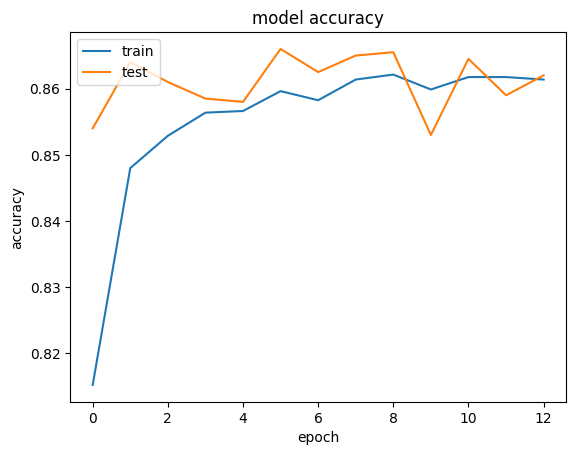

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

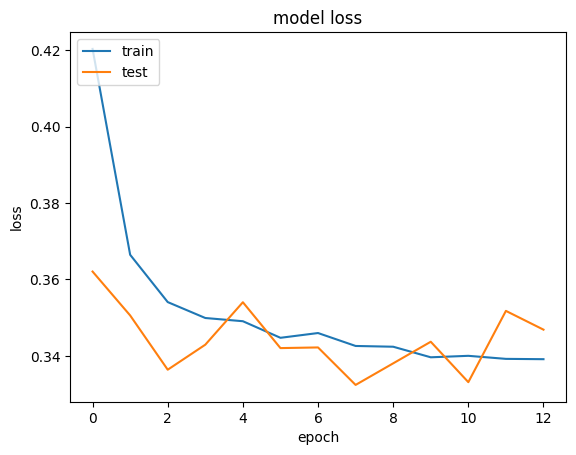

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1550,   45],
       [ 231,  174]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.862

In [ ]:
##get the weights
classifier.get_weights()

[array([[-1.71400696e-01,  9.17355195e-02, -2.70340890e-01,
          1.20627820e-01, -2.61348724e-01,  2.71183141e-02,
          8.94431695e-02,  3.06888402e-01,  2.25546435e-01,
          9.09316912e-02],
        [-2.87157446e-01, -1.61118627e-01,  2.59729910e+00,
          7.20290542e-01, -1.01179719e+00,  3.15259248e-01,
          2.07387877e+00, -8.05245280e-01, -2.11525869e+00,
         -1.47840846e+00],
        [-1.99131295e-01,  9.40283239e-02,  7.44305027e-04,
          6.30326509e-01,  3.79864872e-01, -2.71875784e-02,
         -2.49349028e-02, -5.82884014e-01, -2.97308236e-01,
         -9.38472375e-02],
        [ 7.46595502e-01, -2.34015632e+00, -1.11074515e-01,
         -9.66340244e-01, -8.30879748e-01,  4.41255957e-01,
         -5.26528239e-01, -2.38385320e-01, -1.29395151e+00,
         -2.94847220e-01],
        [ 8.20309162e-01, -2.53476477e+00, -1.02916193e+00,
          5.11834025e-02,  2.65381664e-01,  2.67957735e+00,
         -5.82644679e-02, -3.82635117e-01,  1.075542

In [ ]:
## Saving h5 file
classifier.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')